Consider a Standard Normal 2-D Gaussian $x \sim \mathrm{Normal}(x,\Sigma_x)$

Given a Matrix A and a vector b, we can look at the random number $y = f(x) = Ax + b$.

$y$ will also be normally distributed. Derive the mean and covariance of $p(y) = N(\mu_y, \mathrm{Sigma}_y)$

[Answer on Stack Overflow](https://math.stackexchange.com/questions/332441/affine-transformation-applied-to-a-multivariate-gaussian-random-variable-what)

$\mu_y = A\mu_x + b$

$\Sigma_y = A \sigma_x A^T$

To validate the above result, draw a sample of $p(x) = \mathrm{Normal}(\mathbb{0},\mathbb{1}_2)$, transform it with $f(x)$, with `A = [[1,0.2],[0.2,1]]` and `b = [1,2]` and draw a sample from p(y).

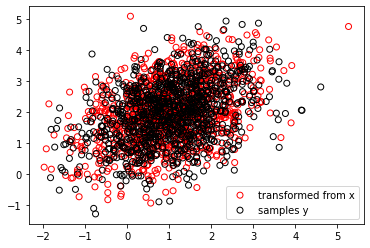

In [27]:
import numpy as np
import matplotlib.pyplot as plt

samples_x = np.random.multivariate_normal([0,0],[[1,0],[0,1]], size = (1000,))

A = np.array([[1,0.2],[0.2,1]])
b = np.array([1,2])

def transform(samples):
    return np.einsum('ij,bj->bi',A,samples) + b

transformed = transform(samples_x)


mean_y = b
cov_y = A @ A.T
samples_y = np.random.multivariate_normal(mean_y,cov_y, size = (1000,))

plt.scatter(transformed[:,0],transformed[:,1], marker = 'o', facecolor = 'none', edgecolor = 'r', label = 'transformed from x')
plt.scatter(samples_y[:,0],samples_y[:,1] , marker = 'o', facecolor = 'none', edgecolor = 'k', label = 'samples y')


plt.legend()

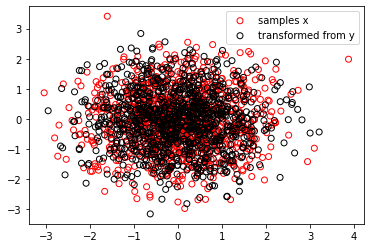

In [28]:
samples_y = np.random.multivariate_normal(mean_y,cov_y, size = (1000,))

def inverse(y):
    Ainv = np.linalg.inv(A)
    return np.einsum('ij,bj->bi',Ainv,y-b)

transformed = inverse(samples_y)


plt.scatter(samples_x[:,0],samples_x[:,1], marker = 'o', facecolor = 'none', edgecolor = 'r', label = 'samples x')
plt.scatter(transformed[:,0],transformed[:,1] , marker = 'o', facecolor = 'none', edgecolor = 'k', label = 'transformed from y')
plt.legend()